In [1]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt

from main_mult import multi_user_budget_constrained_diffusion
from reward import (
    create_four_optima_reward_landscape,
    four_optima_reward_gradient,
    create_three_mode_reward_landscape,
    three_mode_reward_gradient
)

print("JAX version:", jax.__version__)
print("Devices:", jax.devices())


JAX version: 0.6.2
Devices: [CpuDevice(id=0)]


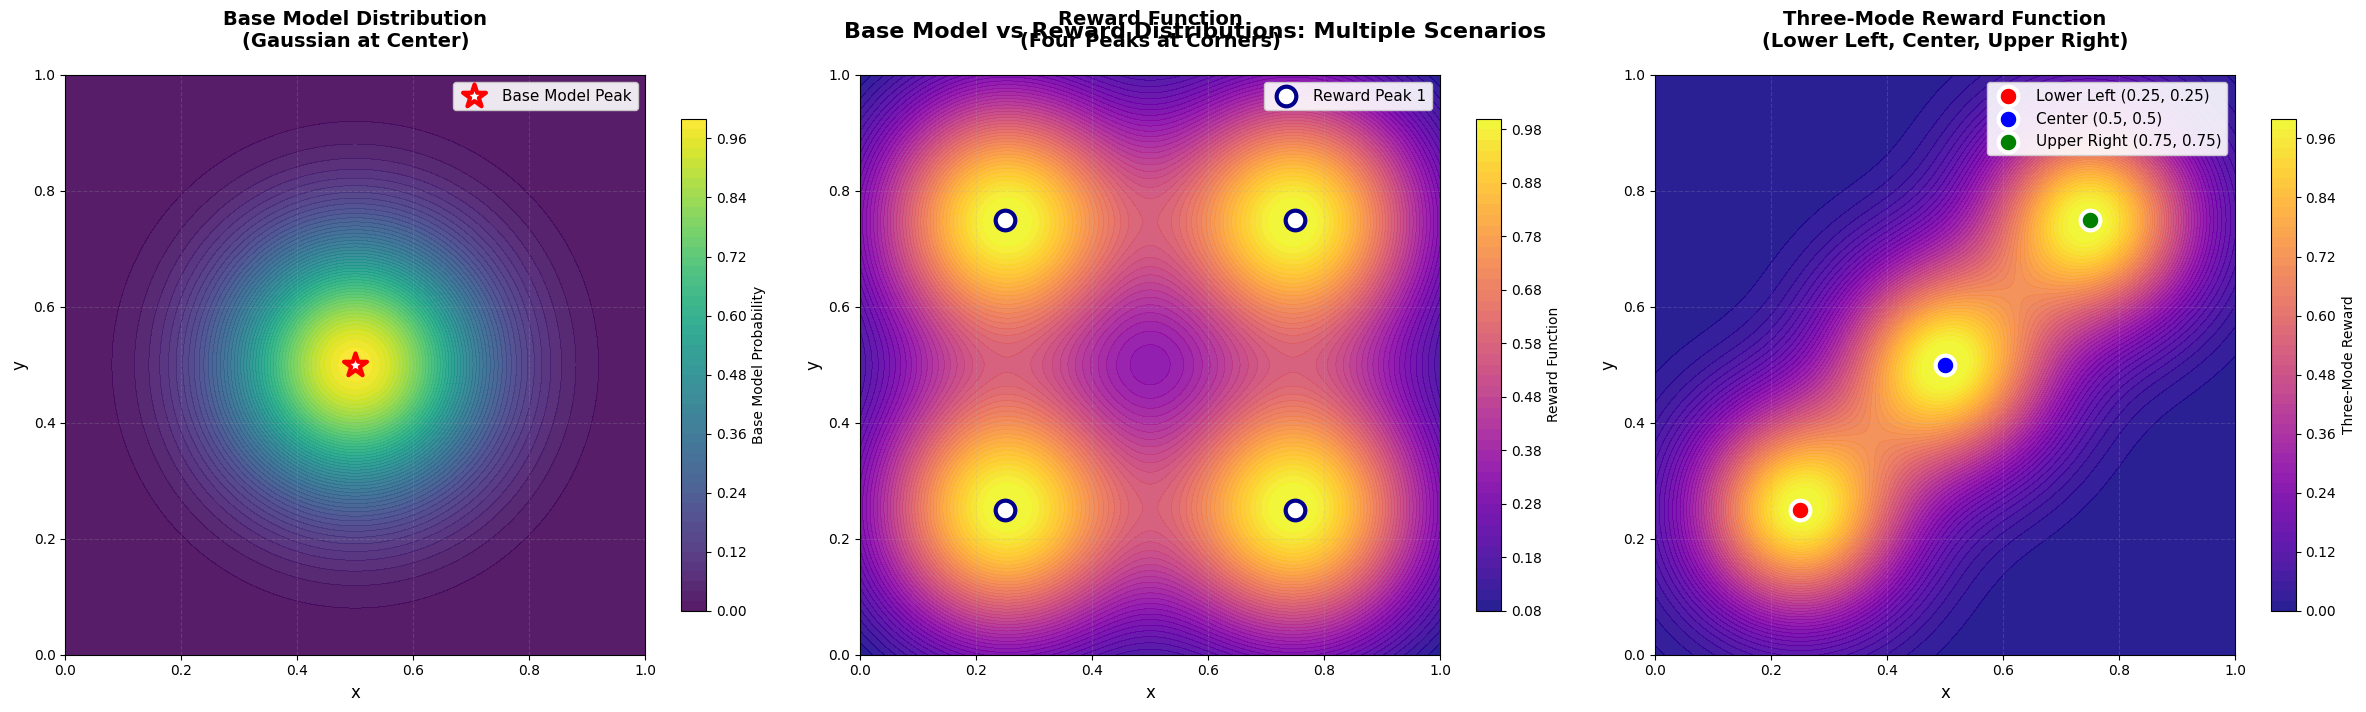

BASE MODEL vs REWARD DISTRIBUTIONS
Base Model: Gaussian at (0.5,0.5), σ=0.15
Four-Quadrant Reward: 4 peaks at corners (0.25,0.25), (0.75,0.25), (0.25,0.75), (0.75,0.75)
Three-Mode Reward: 3 peaks at (0.25,0.25), (0.5,0.5), (0.75,0.75)


In [2]:
from visualization import visualize_base_model_distribution

visualize_base_model_distribution()


In [3]:
# Define reward functions for two users
true_reward_fns = [
    create_four_optima_reward_landscape,    # User 1
    create_three_mode_reward_landscape      # User 2
]

true_reward_grad_fns = [
    four_optima_reward_gradient,
    three_mode_reward_gradient
]

# Experiment parameters
k_observe = 100              # Number of particles to observe per step
B = 1000                     # Total budget
n_users = 2                 # Two users
n_particles = 300           # Particles generated per FKC step
n_steps = 100               # Diffusion time steps

# Network architecture
d_model = 64                # Transformer dimension
n_heads = 4                 # Number of attention heads
n_layers = 3                # Number of Transformer layers

# Training parameters
learning_rate = 0.001       # Network learning rate
convergence_threshold = 0.03  # Per-user convergence threshold
convergence_check_particles = 10  # Particles to check for convergence

# Diversity parameters
gamma_max = 0.05            # Maximum diversity coefficient
gamma_min = 0.0             # Minimum diversity coefficient

print(f"Experiment configuration:")
print(f"  Users: {n_users}")
print(f"  Budget: {B}")
print(f"  Particles per step: {n_particles}")
print(f"  Network: {n_layers} layers, {d_model} dim, {n_heads} heads")


Experiment configuration:
  Users: 2
  Budget: 1000
  Particles per step: 300
  Network: 3 layers, 64 dim, 4 heads


Initializing multi-user reward network...
  Created network for 2 users

Step 0 [COLD START], Budget remaining: 1000
  Training network on 100 observations
    Final loss: 0.0280


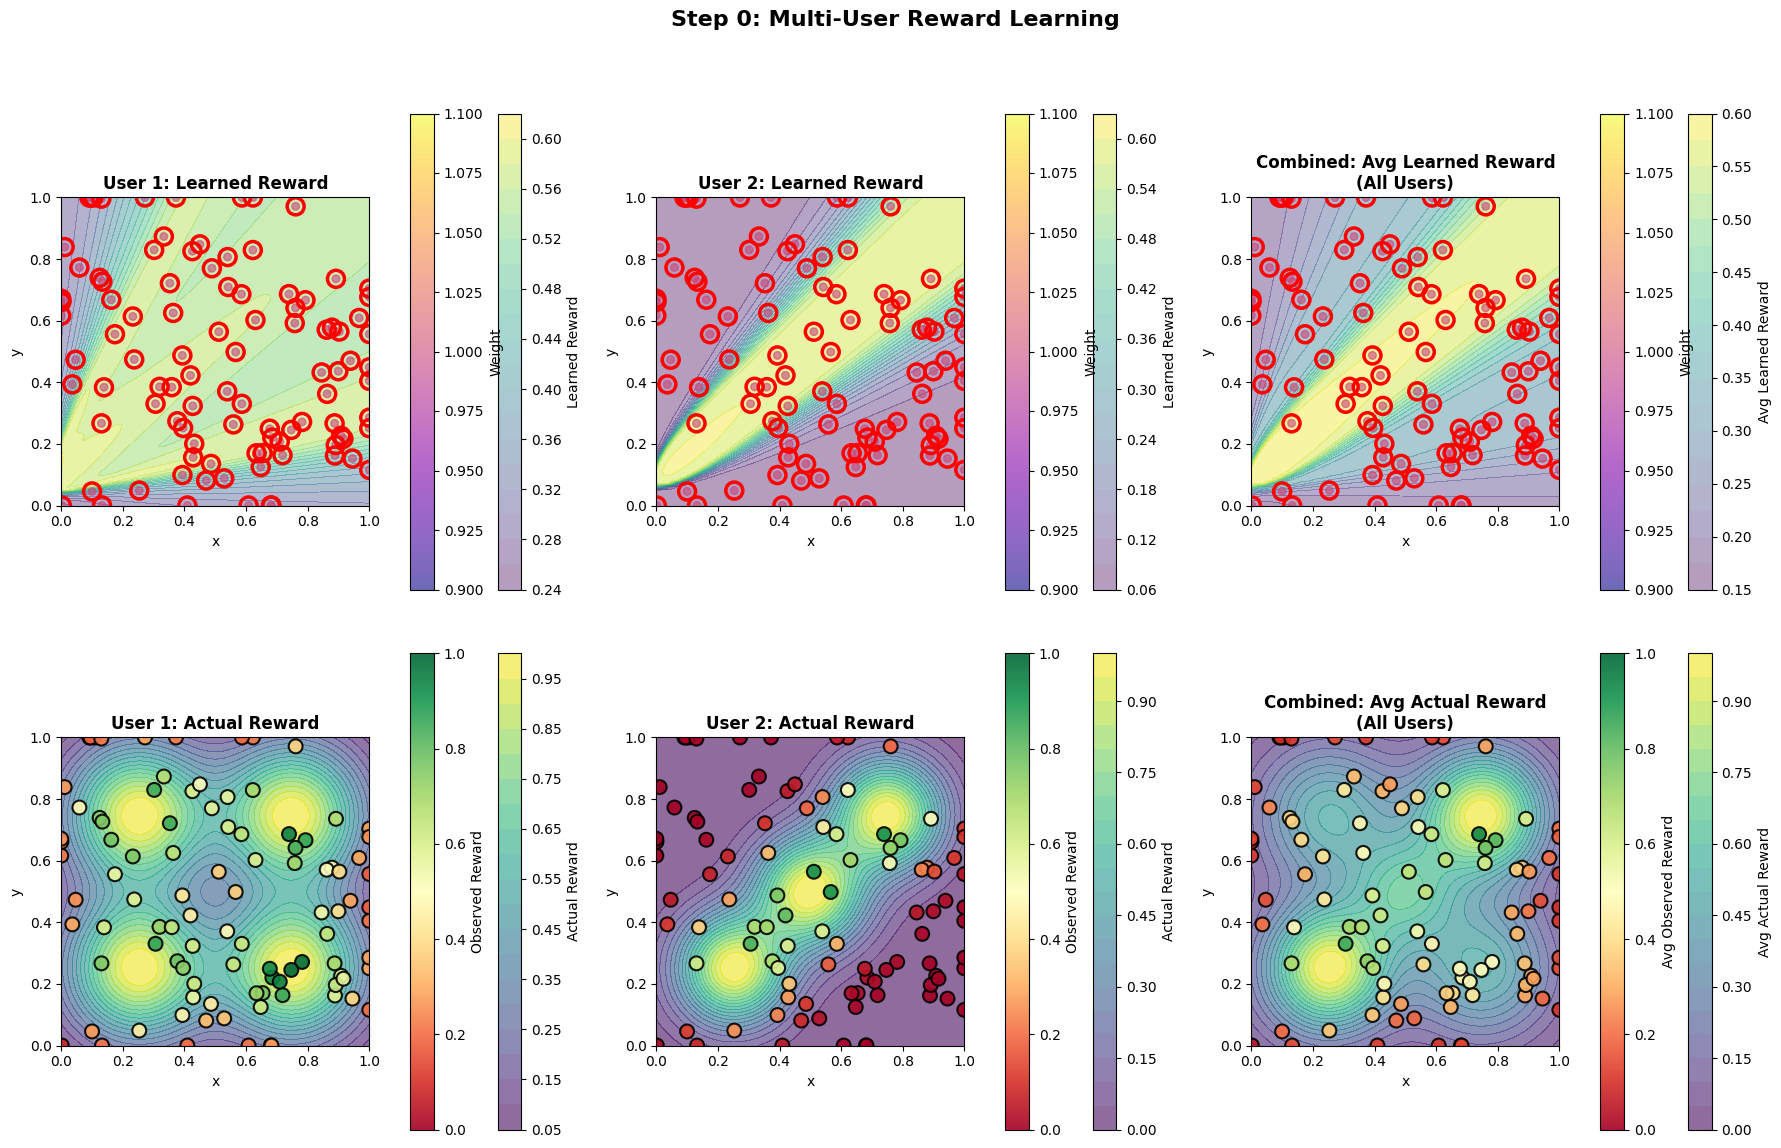


  Step 0 Statistics:
    Per-user success rates: [0.22999999 0.09      ]
    Overall success rate: 0.160
    Mean rewards per user: [0.5082489  0.19950643]

Step 1, Budget remaining: 900
  Convergence check:
    User 1: 0.2296 [exploring]
    User 2: 0.1098 [exploring]
  Diversity enabled: 2/2 users still exploring
  Gamma: 0.050 | Diversity: True
  Historical particles: 100
    Weight range: [0.00, 1.00]
    Selected weights: [0.79, 1.00]
  Training network on 200 observations...
    Final loss: 0.0174


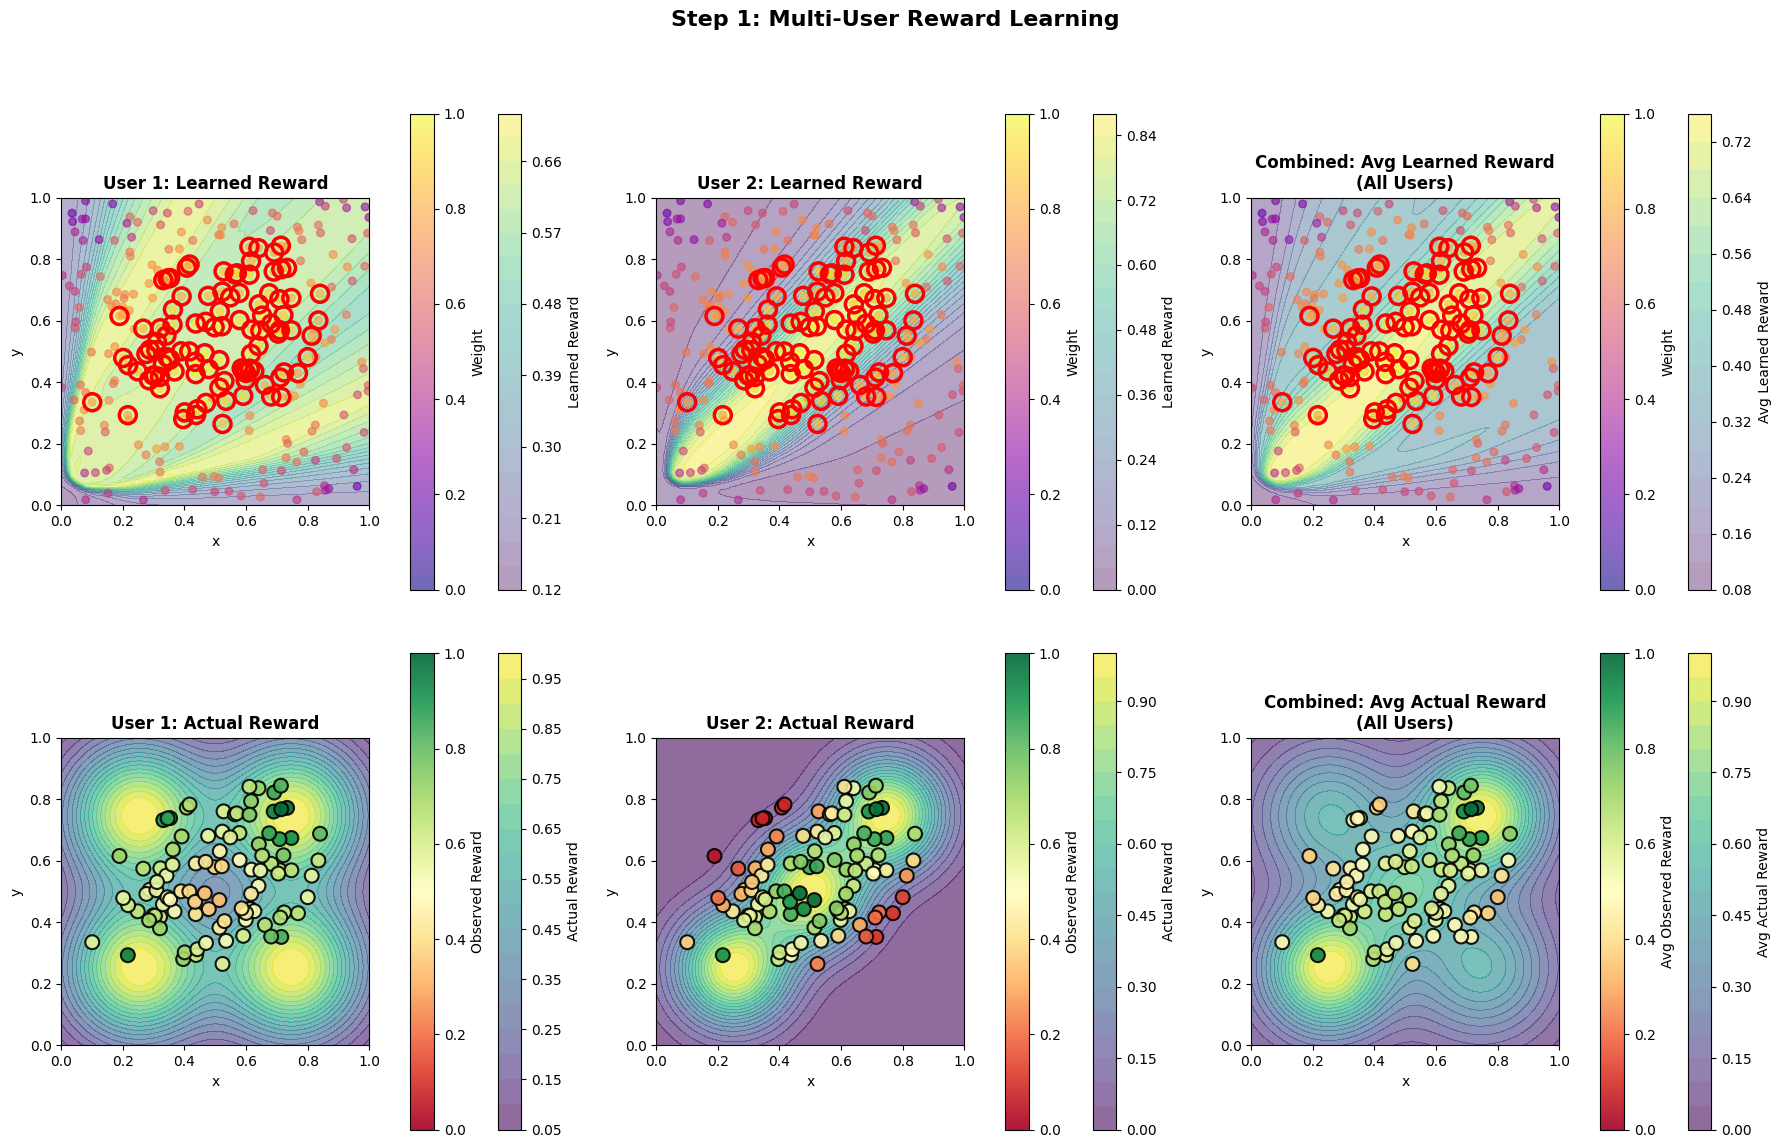


  Step 1 Statistics:
    Per-user success rates: [0.24 0.24]
    Overall success rate: 0.240
    Mean rewards per user: [0.6171254 0.5347016]

Step 2, Budget remaining: 800
  Convergence check:
    User 1: 0.1290 [exploring]
    User 2: 0.0968 [exploring]
  Diversity enabled: 2/2 users still exploring
  Gamma: 0.044 | Diversity: True
  Historical particles: 200
    Weight range: [0.00, 1.00]
    Selected weights: [0.74, 1.00]
  Training network on 300 observations...
    Final loss: 0.0178


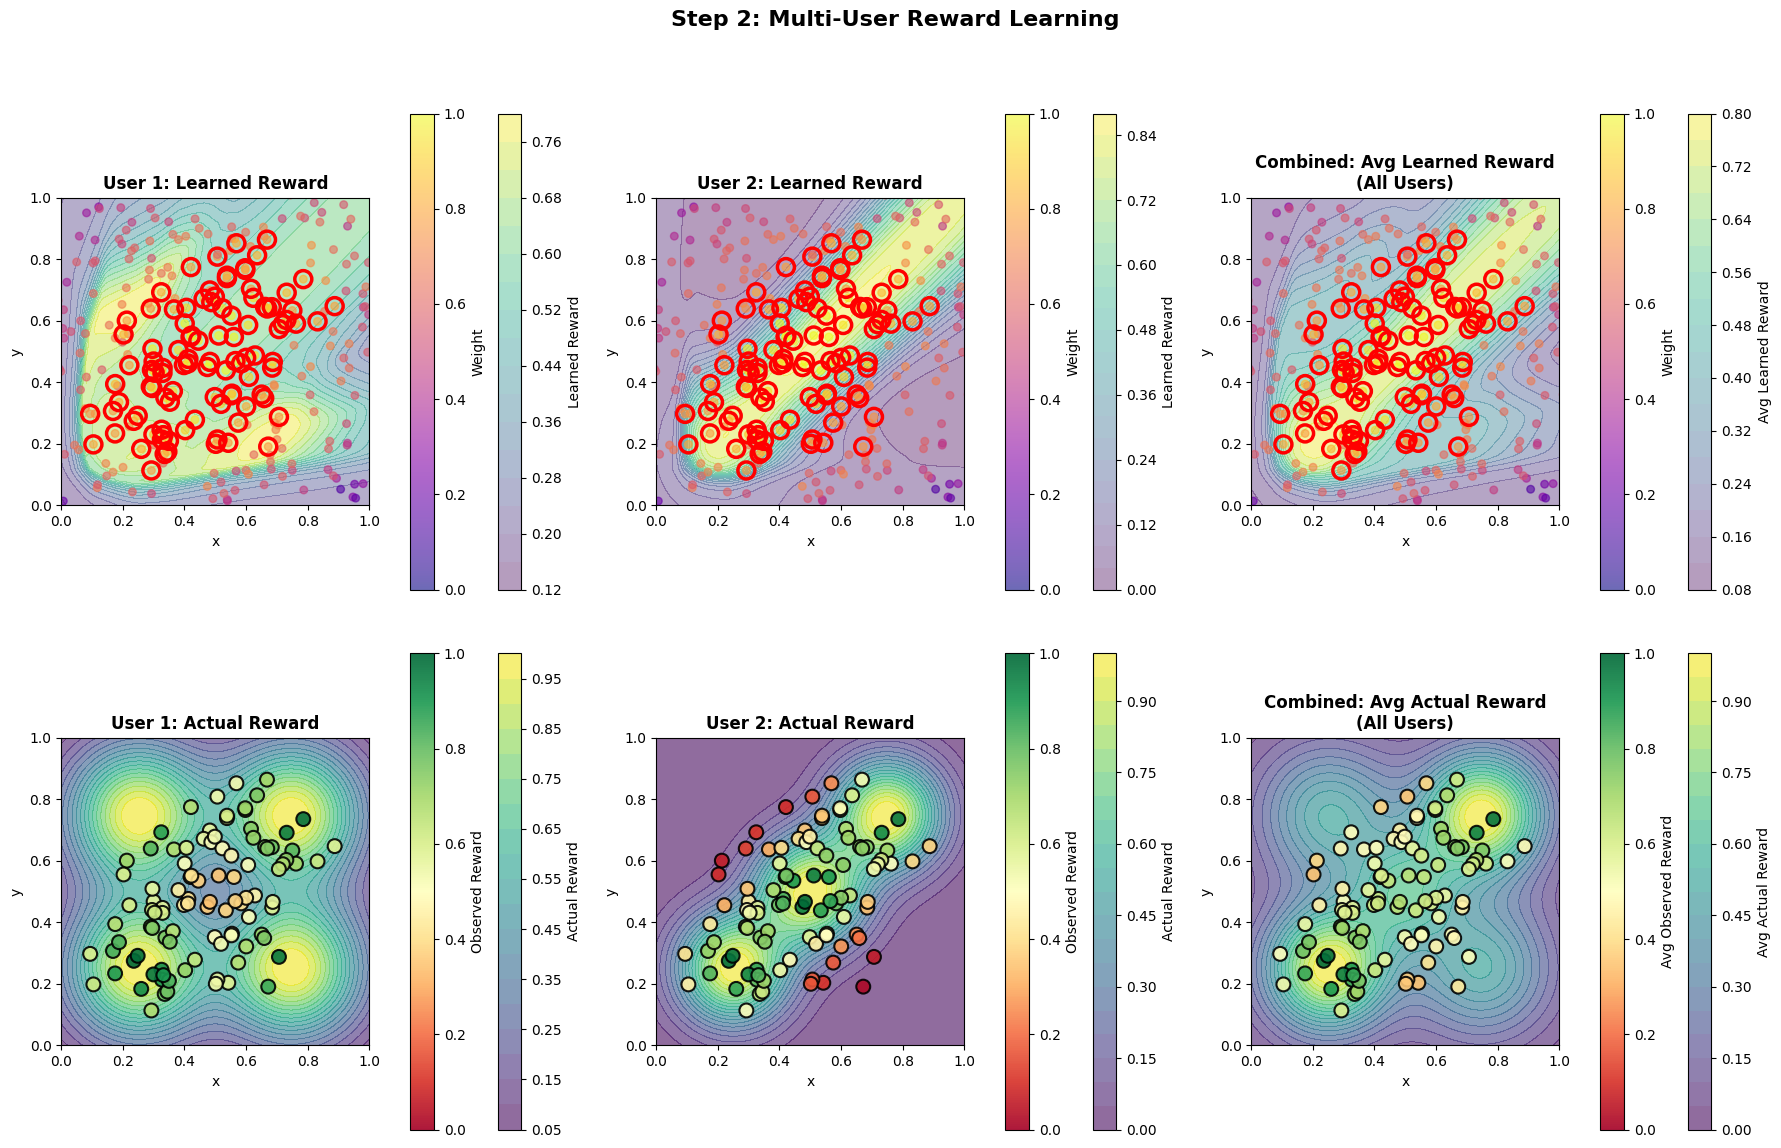


  Step 2 Statistics:
    Per-user success rates: [0.39 0.37]
    Overall success rate: 0.380
    Mean rewards per user: [0.6443913 0.5617863]

Step 3, Budget remaining: 700
  Convergence check:
    User 1: 0.1633 [exploring]
    User 2: 0.0764 [exploring]
  Diversity enabled: 2/2 users still exploring
  Gamma: 0.039 | Diversity: True
  Historical particles: 300
    Weight range: [0.00, 1.00]
    Selected weights: [0.72, 1.00]
  Training network on 400 observations...
    Final loss: 0.0032


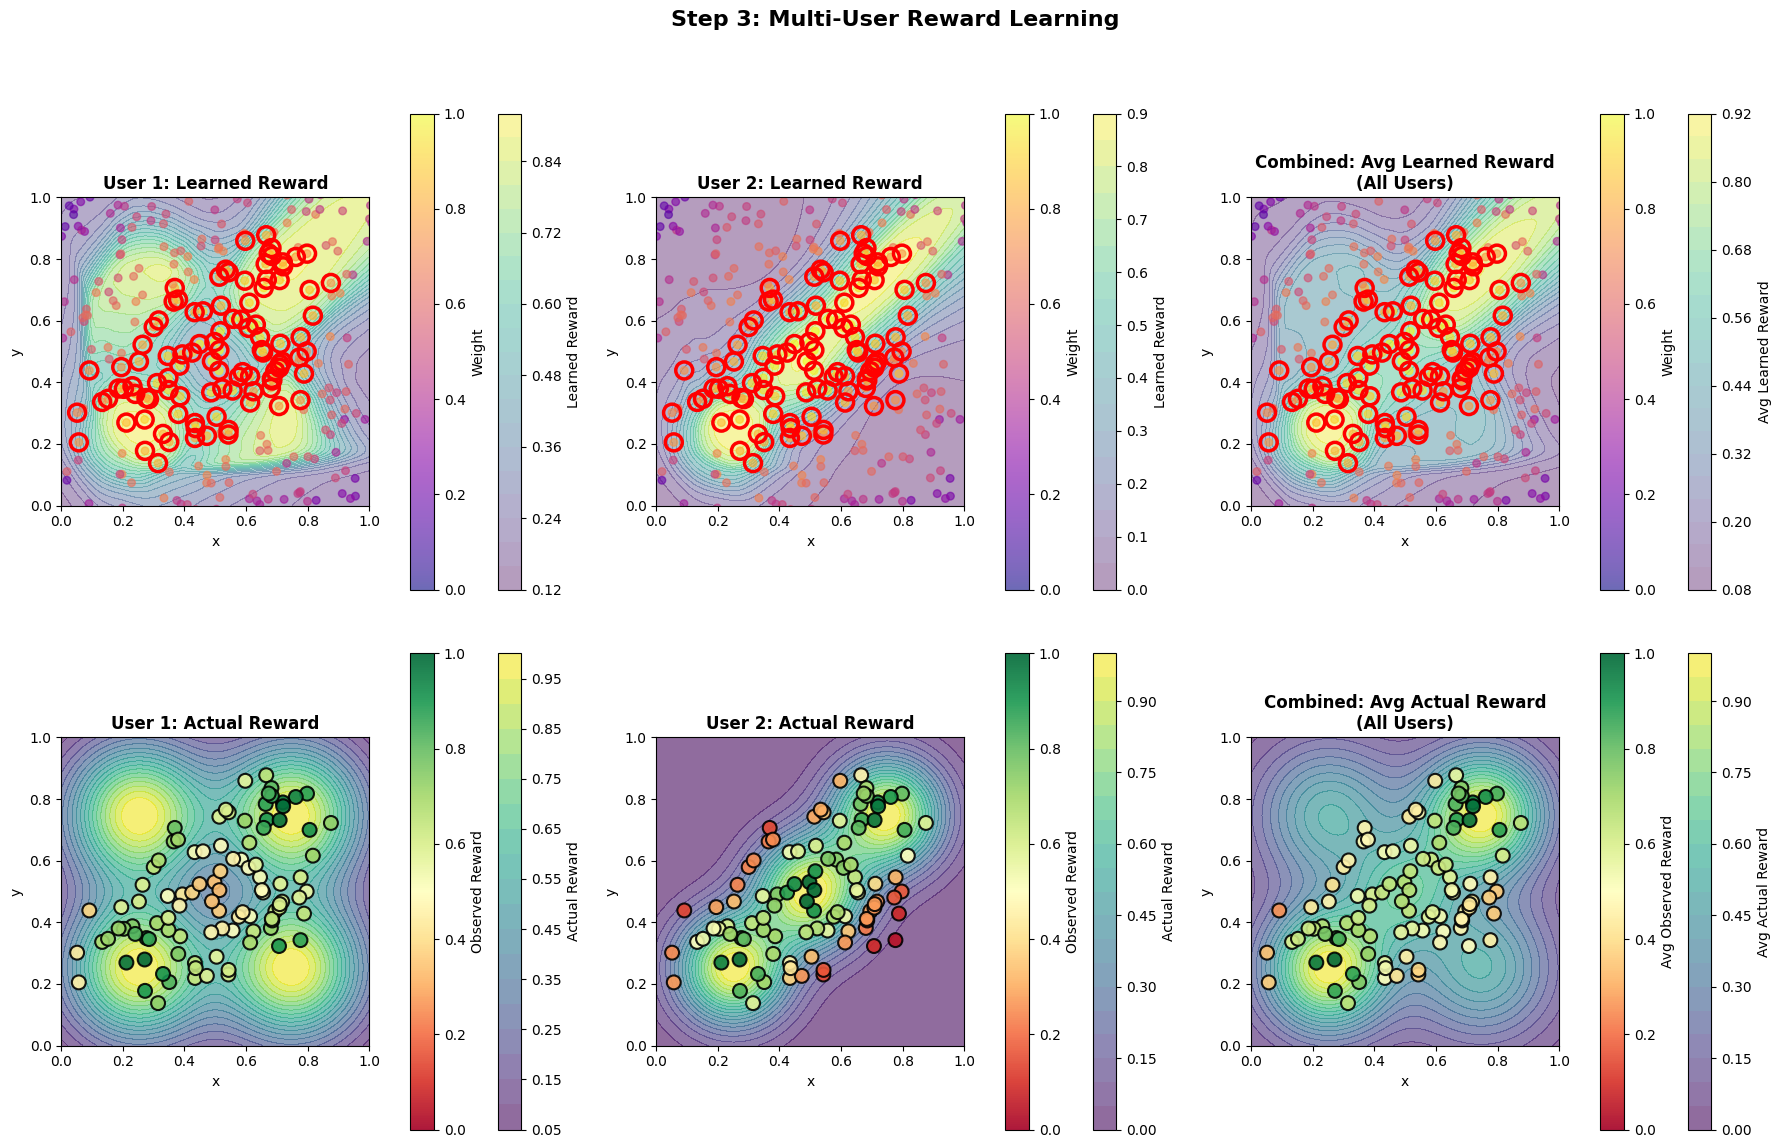


  Step 3 Statistics:
    Per-user success rates: [0.35 0.31]
    Overall success rate: 0.330
    Mean rewards per user: [0.64617276 0.54712754]

Step 4, Budget remaining: 600
  Convergence check:
    User 1: 0.0660 [exploring]
    User 2: 0.0597 [exploring]
  Diversity enabled: 2/2 users still exploring
  Gamma: 0.033 | Diversity: True
  Historical particles: 400
    Weight range: [0.00, 1.00]
    Selected weights: [0.70, 1.00]
  Training network on 500 observations...
    Final loss: 0.0027


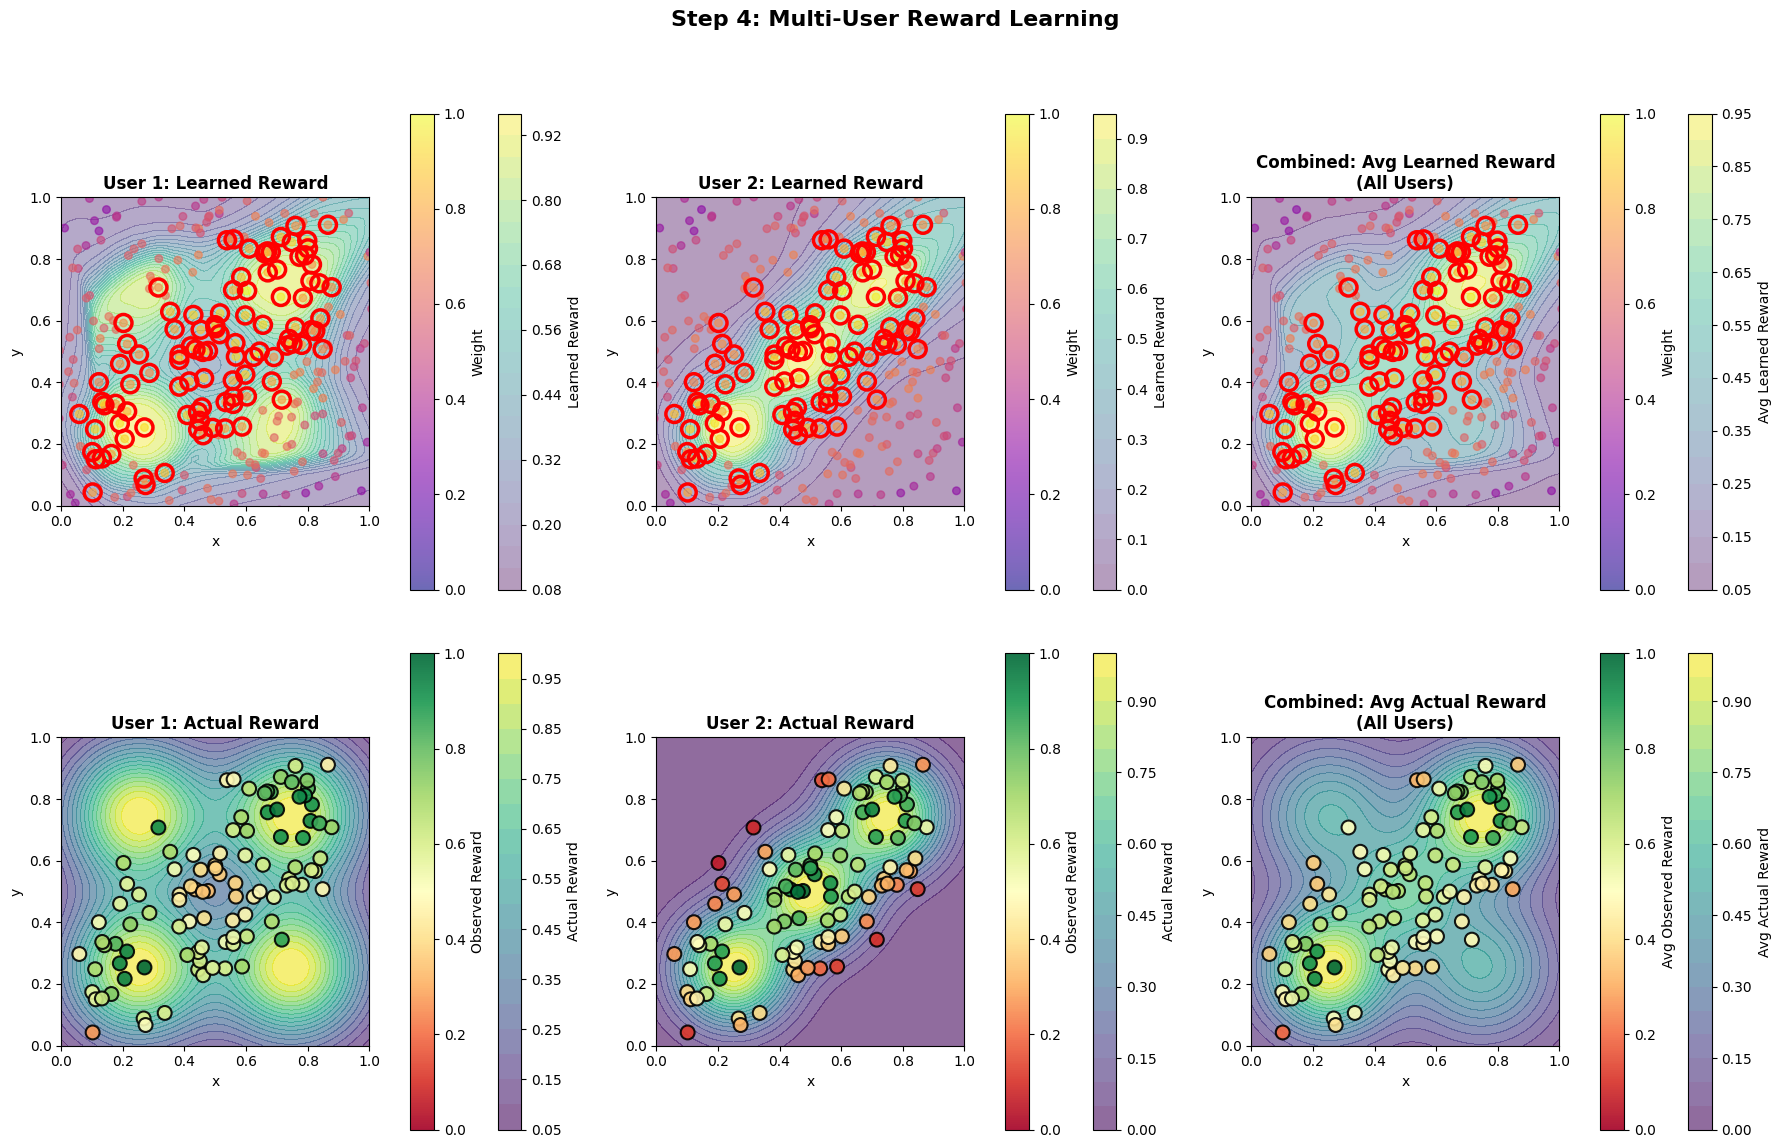


  Step 4 Statistics:
    Per-user success rates: [0.28 0.31]
    Overall success rate: 0.295
    Mean rewards per user: [0.62544537 0.5475889 ]

Step 5, Budget remaining: 500
  Convergence check:
    User 1: 0.0380 [exploring]
    User 2: 0.0348 [exploring]
  Diversity enabled: 2/2 users still exploring
  Gamma: 0.028 | Diversity: True
  Historical particles: 500
    Weight range: [0.00, 1.00]
    Selected weights: [0.69, 1.00]
  Training network on 600 observations...
    Final loss: 0.0003


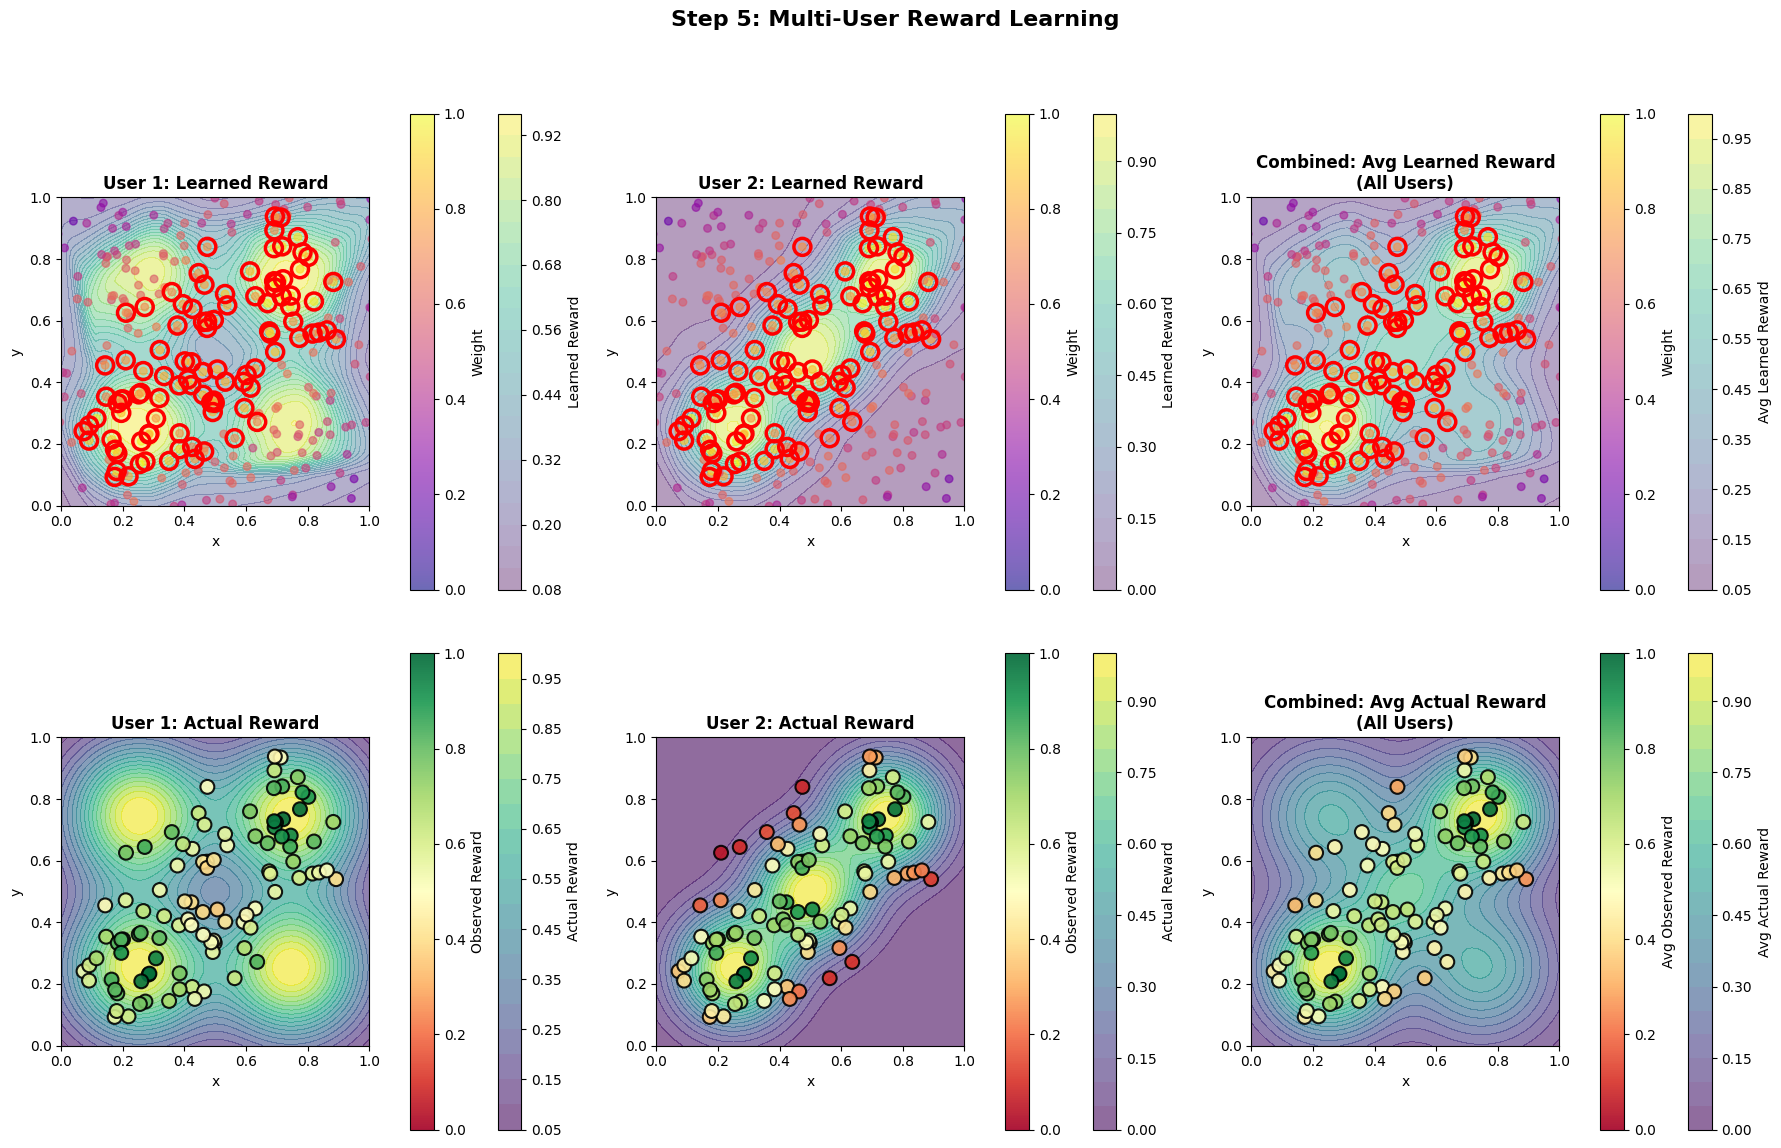


  Step 5 Statistics:
    Per-user success rates: [0.41 0.38]
    Overall success rate: 0.395
    Mean rewards per user: [0.66499144 0.5673093 ]

Step 6, Budget remaining: 400
  Convergence check:
    User 1: 0.0090 [converged]
    User 2: 0.0039 [converged]
  *** DIVERSITY DISABLED: All users converged ***
  Gamma: 0.022 | Diversity: False
  Historical particles: 600
    Weight range: [0.00, 1.00]
    Selected weights: [0.32, 1.00]
  Training network on 700 observations...
    Final loss: 0.0046


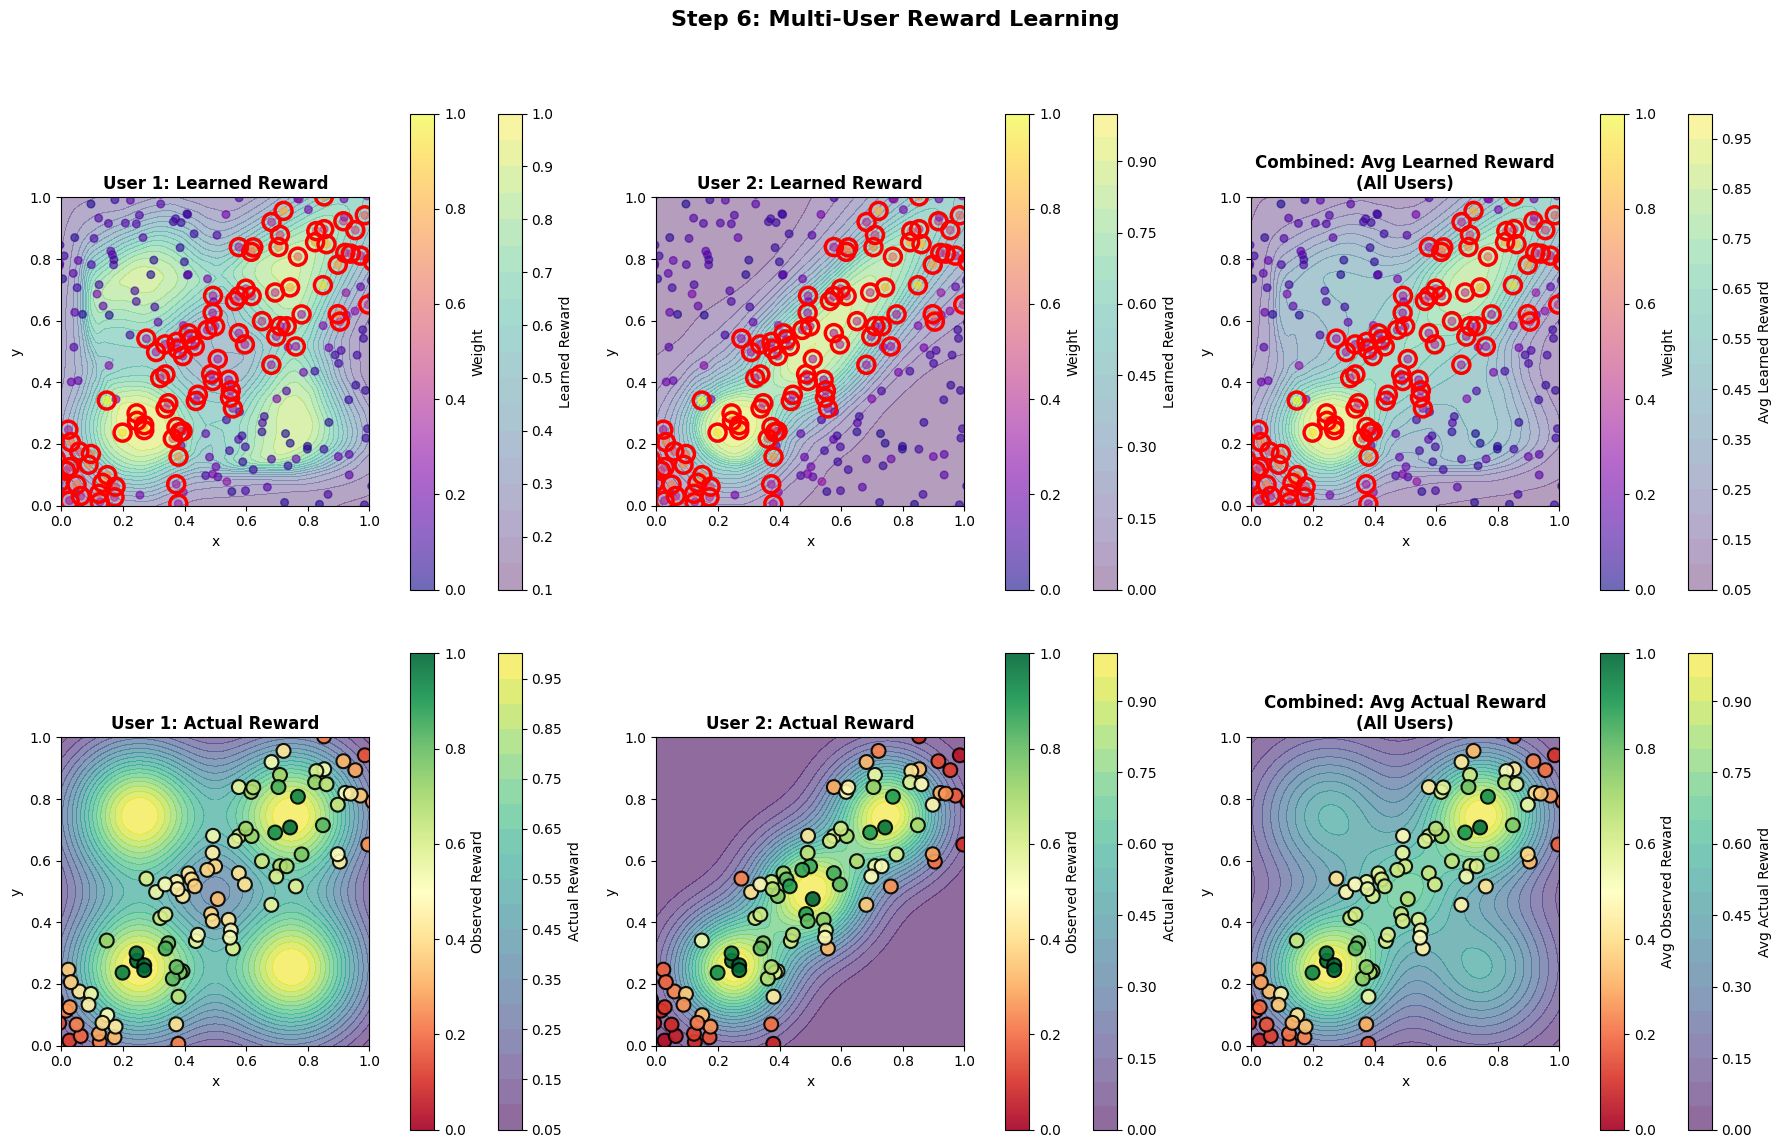


  Step 6 Statistics:
    Per-user success rates: [0.22       0.22999999]
    Overall success rate: 0.225
    Mean rewards per user: [0.52264494 0.4724326 ]

Step 7, Budget remaining: 300
  Gamma: 0.017 | Diversity: False
  Historical particles: 700
    Weight range: [0.00, 1.00]
    Selected weights: [0.26, 1.00]
  Training network on 800 observations...
    Final loss: 0.0019


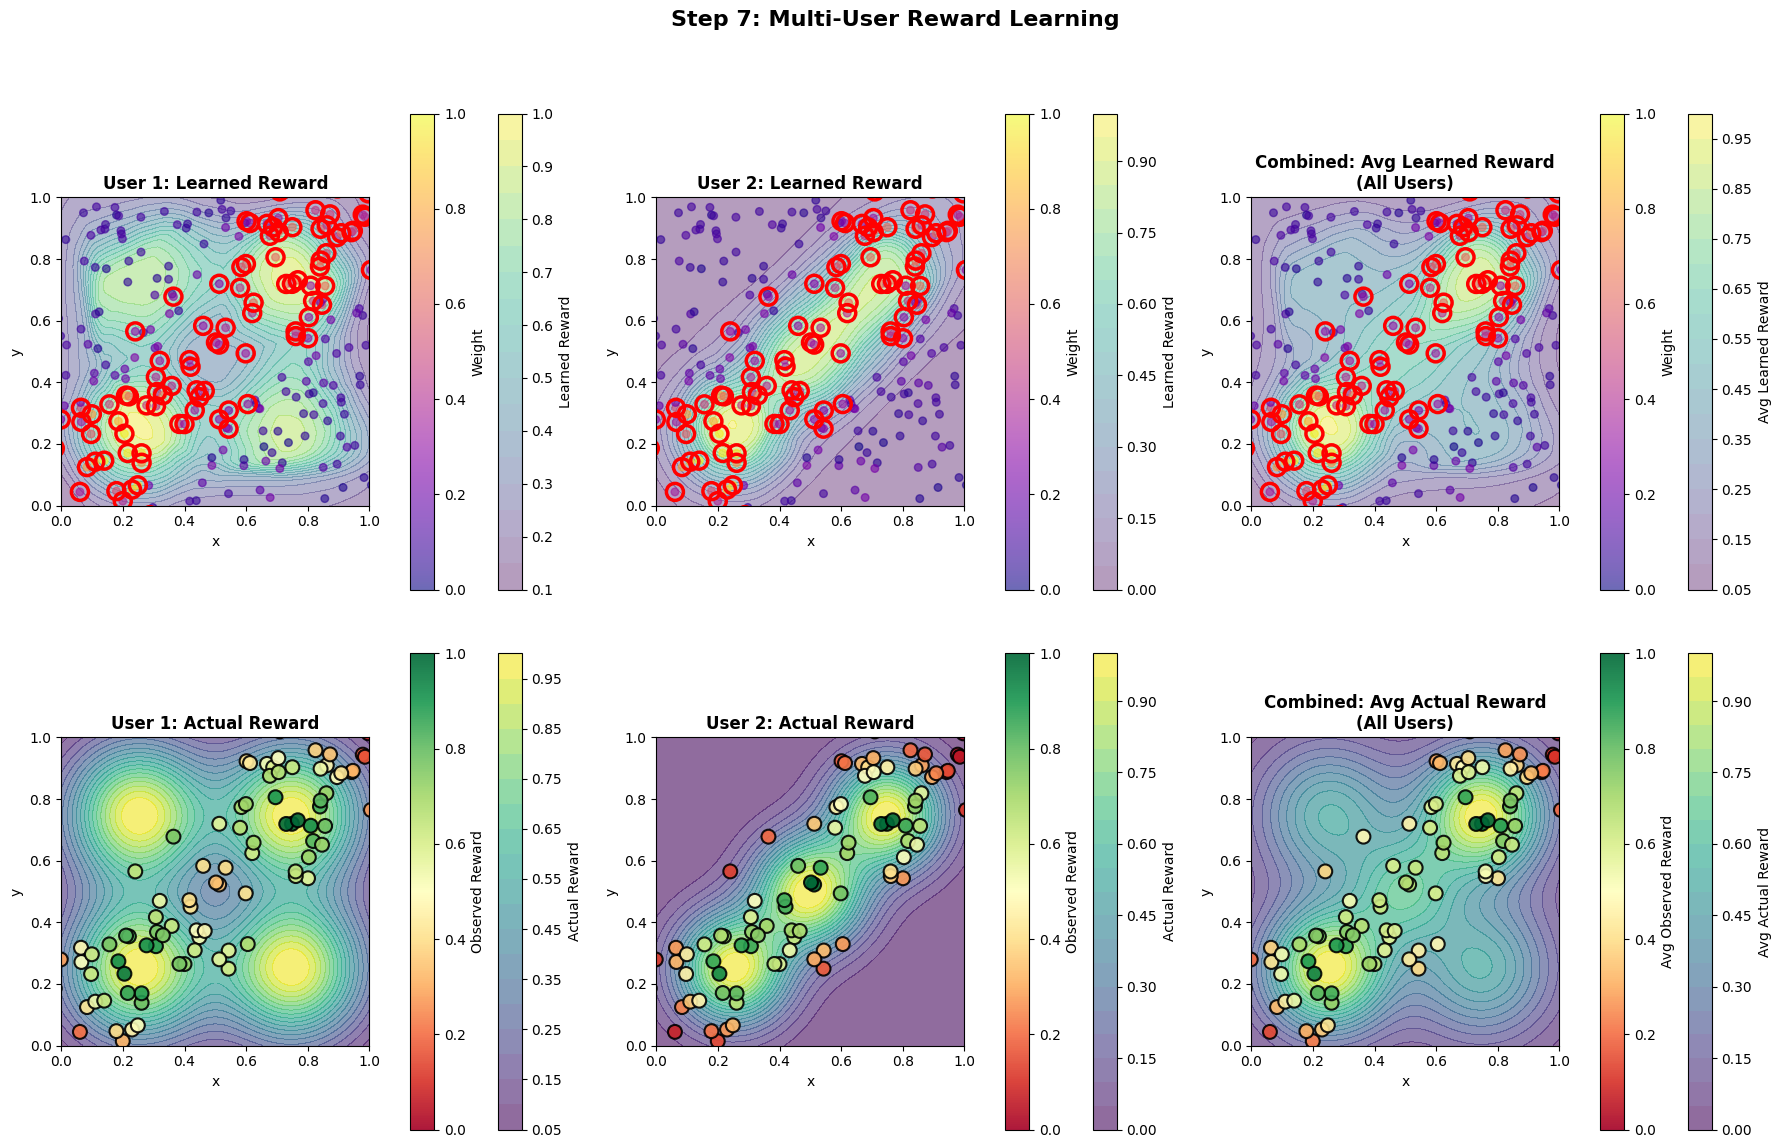


  Step 7 Statistics:
    Per-user success rates: [0.28 0.26]
    Overall success rate: 0.270
    Mean rewards per user: [0.539799   0.44792473]

Step 8, Budget remaining: 200
  Gamma: 0.011 | Diversity: False
  Historical particles: 800
    Weight range: [0.00, 1.00]
    Selected weights: [0.25, 1.00]
  Training network on 900 observations...
    Final loss: 0.0004


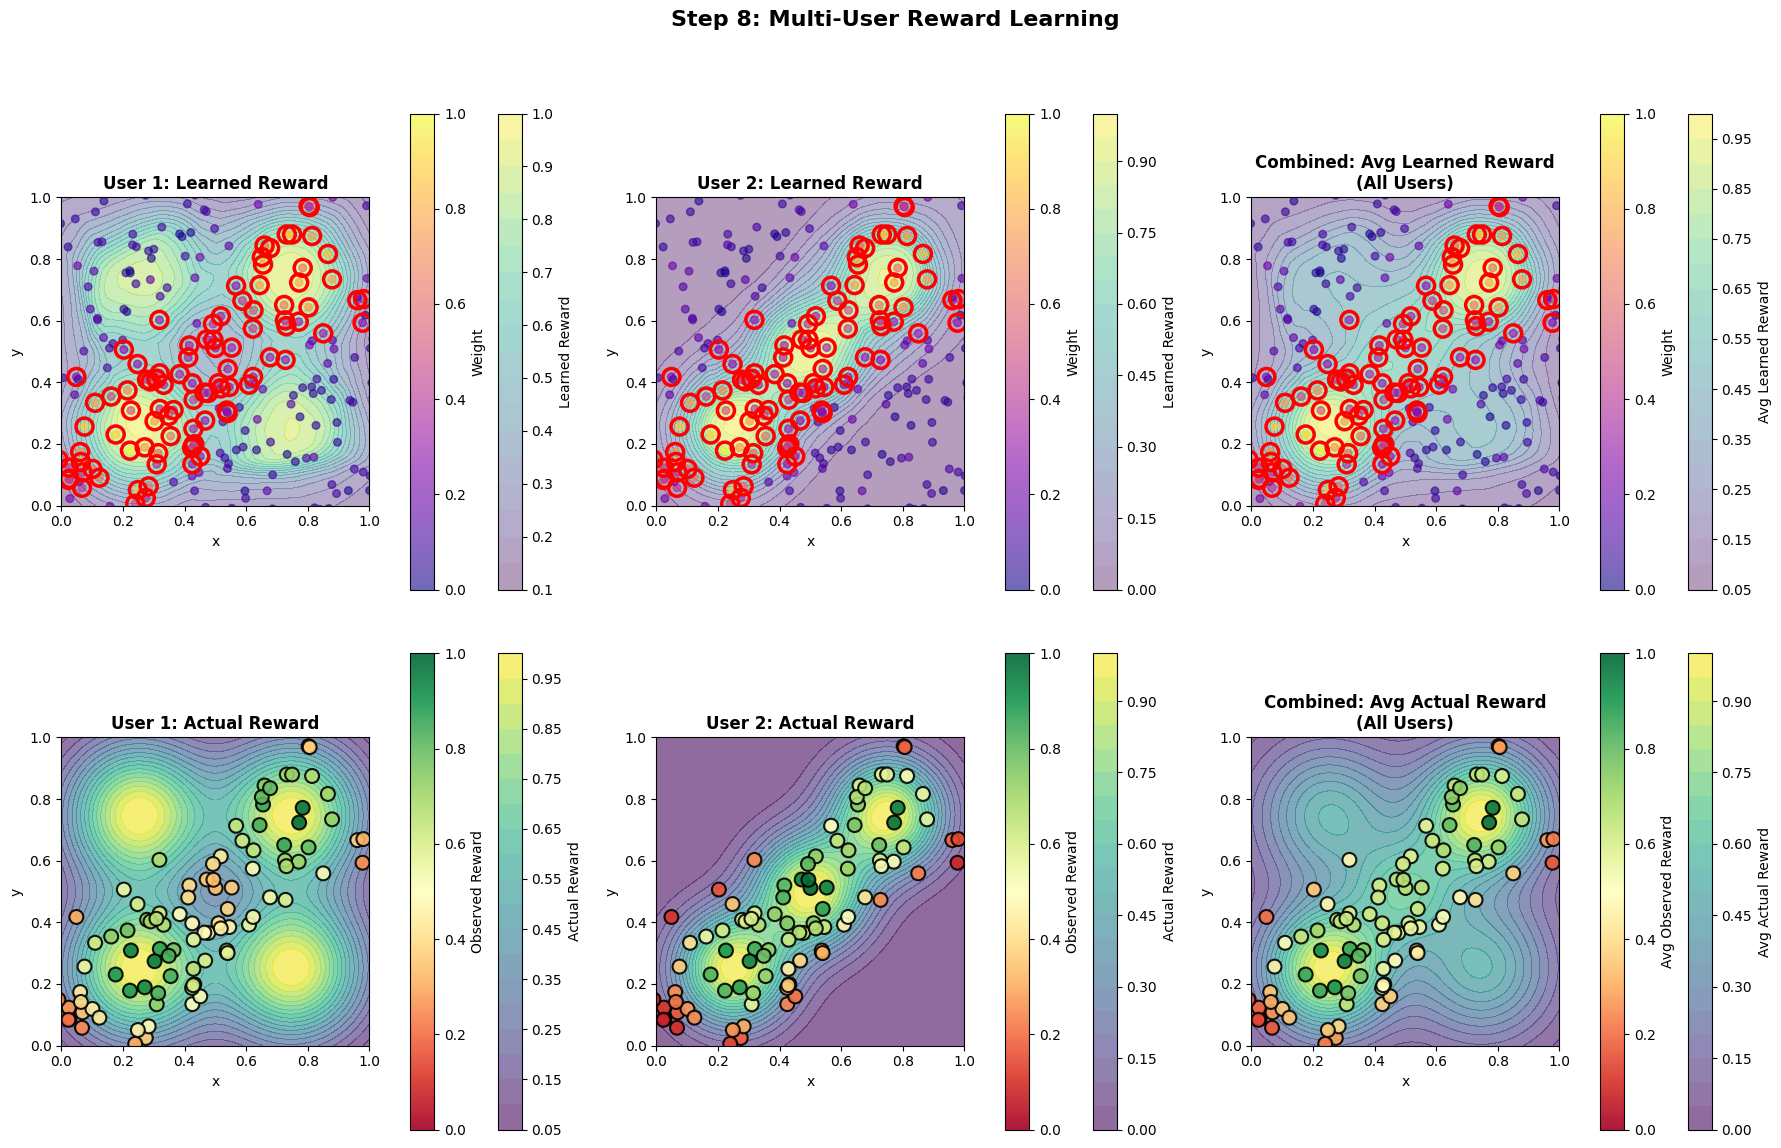


  Step 8 Statistics:
    Per-user success rates: [0.29 0.29]
    Overall success rate: 0.290
    Mean rewards per user: [0.56488305 0.50427145]

Step 9, Budget remaining: 100
  Gamma: 0.006 | Diversity: False
  Historical particles: 900
    Weight range: [0.00, 1.00]
    Selected weights: [0.25, 1.00]
  Training network on 1000 observations...
    Final loss: 0.0002


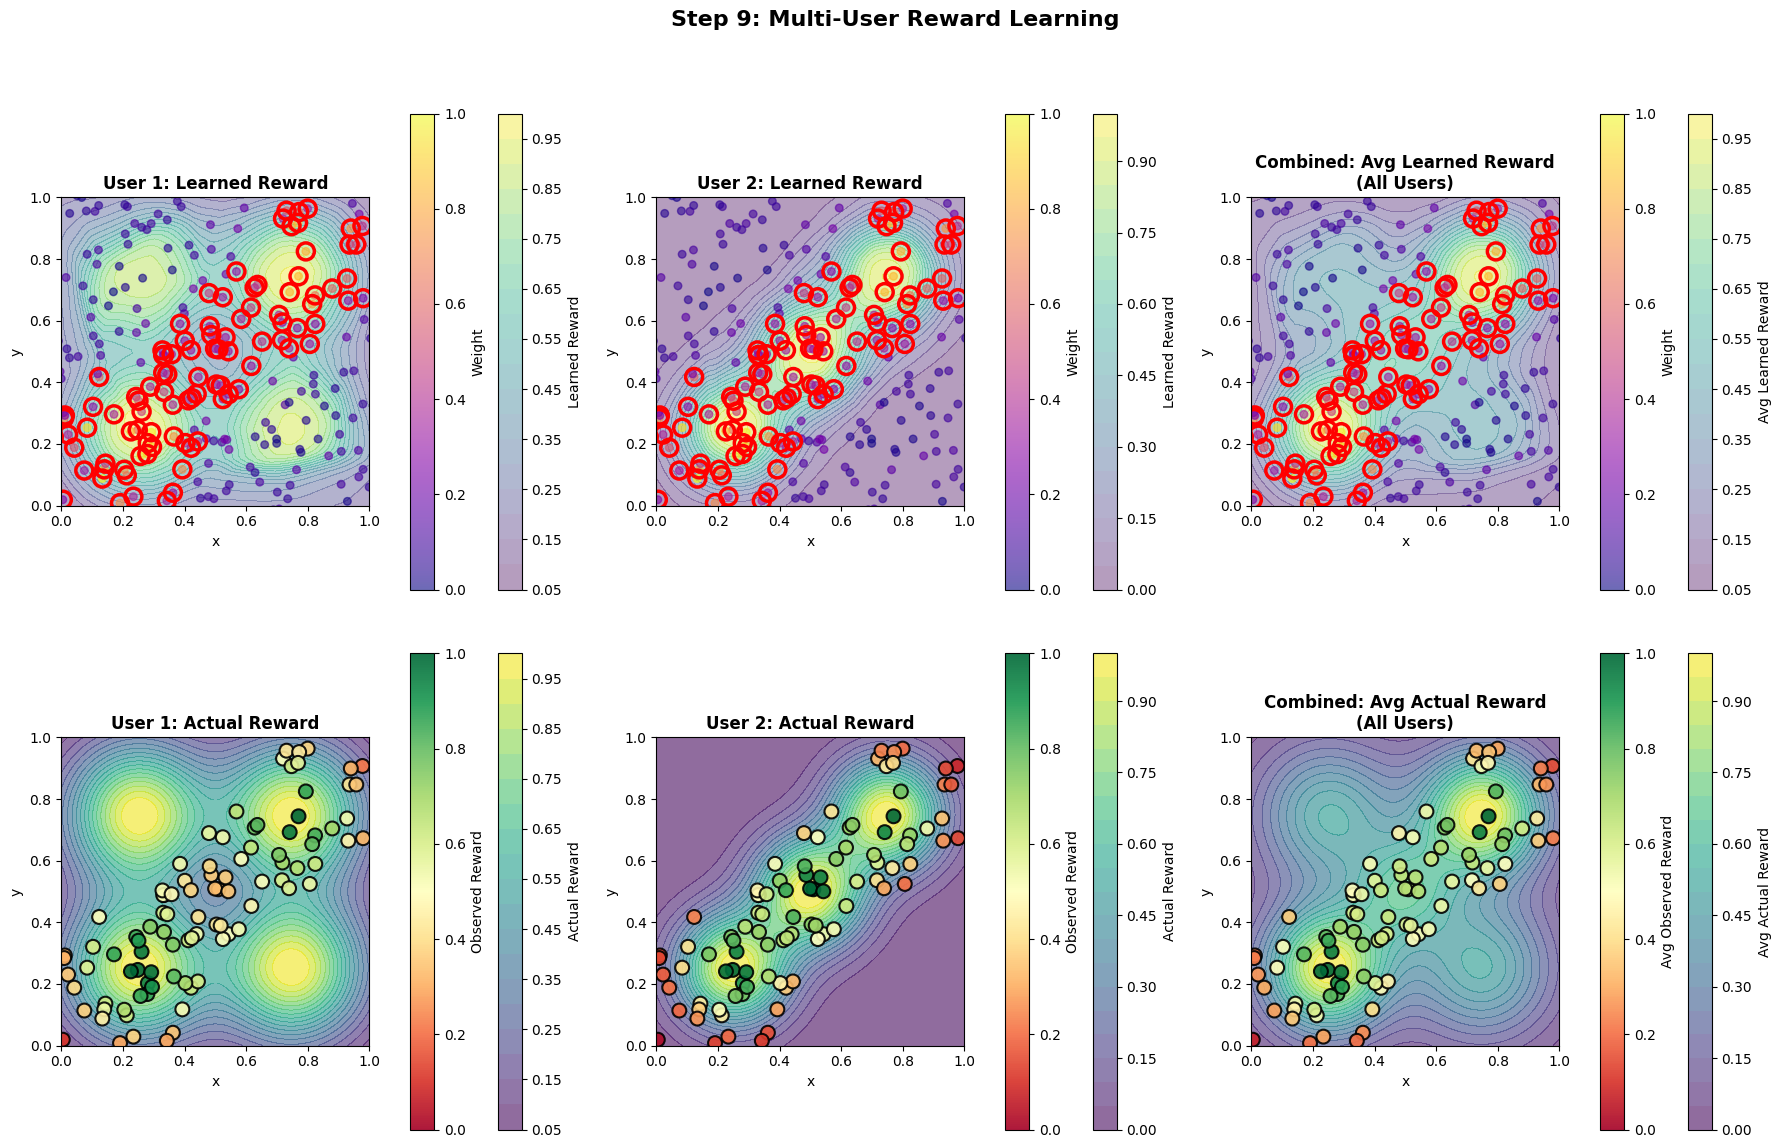


  Step 9 Statistics:
    Per-user success rates: [0.24 0.31]
    Overall success rate: 0.275
    Mean rewards per user: [0.55920583 0.5171232 ]


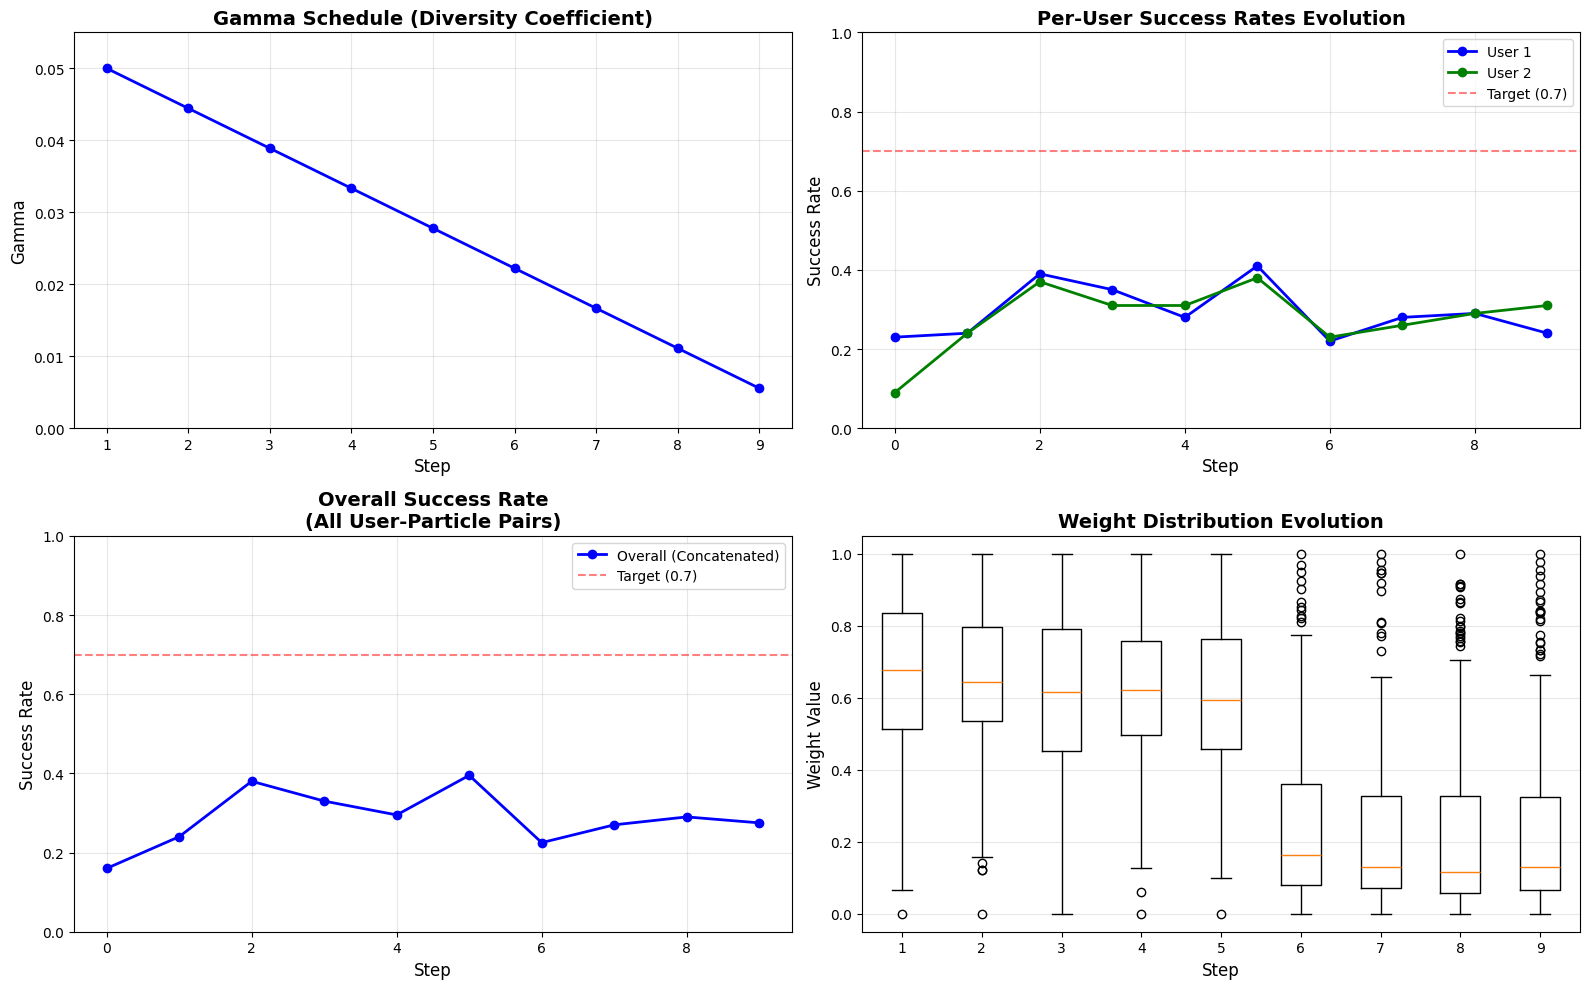


GAMMA AND SUCCESS RATE SUMMARY
Steps: 9 | Gamma: 0.006→0.050
Selection: top-100 particles | Final gamma: 0.006
Final per-user success: [0.24 0.31]
Final overall success: 0.275


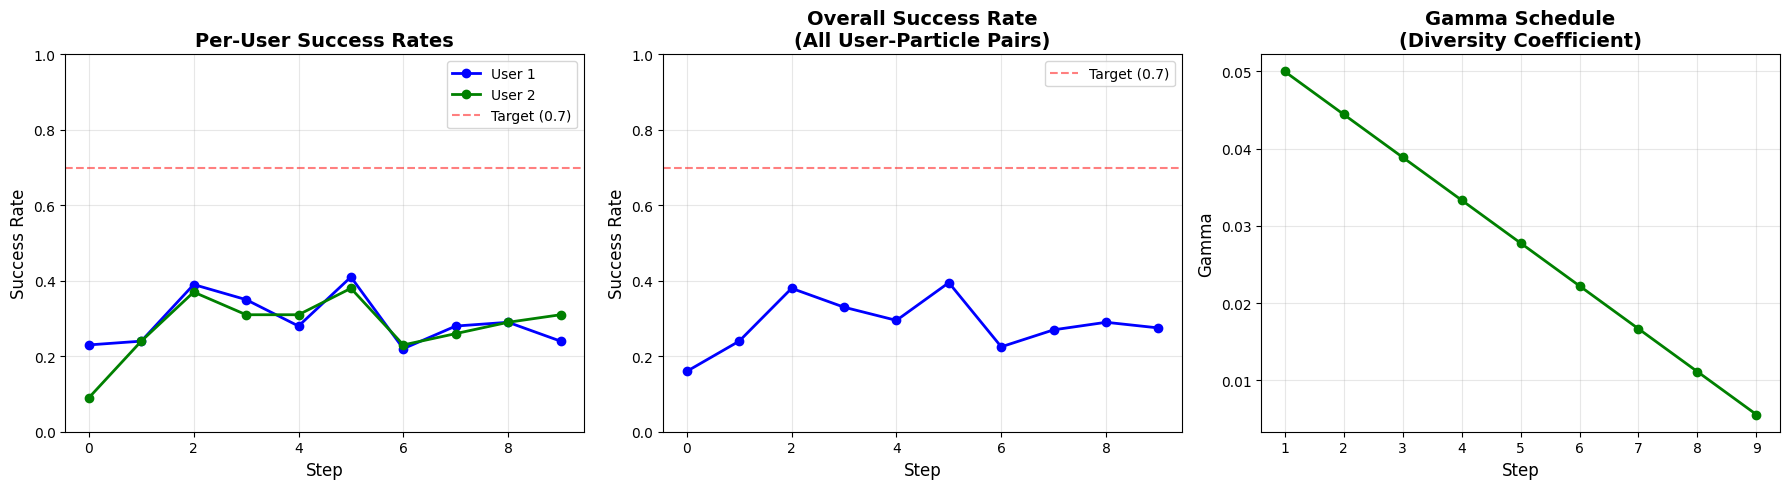


FINAL SUMMARY
Total steps: 10

Per-User Success Rates:
  User 1: 0.240
  User 2: 0.310

Overall (concatenated across all users): 0.275

Experiment completed


In [4]:
results = multi_user_budget_constrained_diffusion(
    k_observe=k_observe,
    B=B,
    n_users=n_users,
    n_particles=n_particles,
    n_steps=n_steps,
    true_reward_fns=true_reward_fns,
    true_reward_grad_fns=true_reward_grad_fns,
    d_model=d_model,
    n_heads=n_heads,
    n_layers=n_layers,
    learning_rate=learning_rate,
    convergence_threshold=convergence_threshold,
    convergence_check_particles=convergence_check_particles,
    gamma_max=gamma_max,
    gamma_min=gamma_min
)

print("\nExperiment completed")


In [5]:
# Unpack results
(
    all_particles,
    all_weights,
    all_observed_particles,
    all_observed_rewards,
    success_rates_per_user_history,
    success_rates_overall_history,
    network,
    network_params,
    opt_state,
    gamma_history
) = results

print(f"Total steps: {len(success_rates_overall_history)}")
print(f"Final per-user success rates:")
print(f"  User 1 (four-optima): {success_rates_per_user_history[-1][0]:.3f}")
print(f"  User 2 (three-mode): {success_rates_per_user_history[-1][1]:.3f}")
print(f"Final overall success: {success_rates_overall_history[-1]:.3f}")


Total steps: 10
Final per-user success rates:
  User 1 (four-optima): 0.240
  User 2 (three-mode): 0.310
Final overall success: 0.275
